In [1]:
# medians = []
# for col in numerical_cols: # Changed 'numerical_columns' to 'numerical_cols'
#     median = df[col].median()
#     medians.append(median)
# medians

# upper_bounds = []
# lower_bounds = []
# Q1s = []
# Q3s = []
# IQRs = []
# for col in numerical_cols: # Changed 'numerical_columns' to 'numerical_cols'
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3-Q1
#     Q1s.append(Q1)
#     Q3s.append(Q3)
#     IQRs.append(IQR)
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     lower_bounds.append(lower)
#     upper_bounds.append(upper)


# type(lower_bounds)

# #in each columns make the values which grater than or smaller than lowwer,upper be the median of col
# for i in range(len(numerical_cols)): # Changed 'numerical_columns' to 'numerical_cols'
#     col = numerical_cols[i] # Changed 'numerical_columns' to 'numerical_cols'
#     low_value = lower_bounds[i]
#     upper_value = upper_bounds[i]
#     median_value = medians[i]
#     data.loc[(data[col] < low_value), col] = median_value
#     data.loc[(data[col] > upper_value), col] = median_value

In [2]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 92.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4511e75d99fdfd5615c73294fd1e4fb7df259d3fff7221389331f6ba97ac3f01
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno

In [4]:
df = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df['Diabetes_012'].value_counts()

,count
Diabetes_012,
0.0,213703
2.0,35346
1.0,4631


#Data Preprocessing

In [6]:
df.isna().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


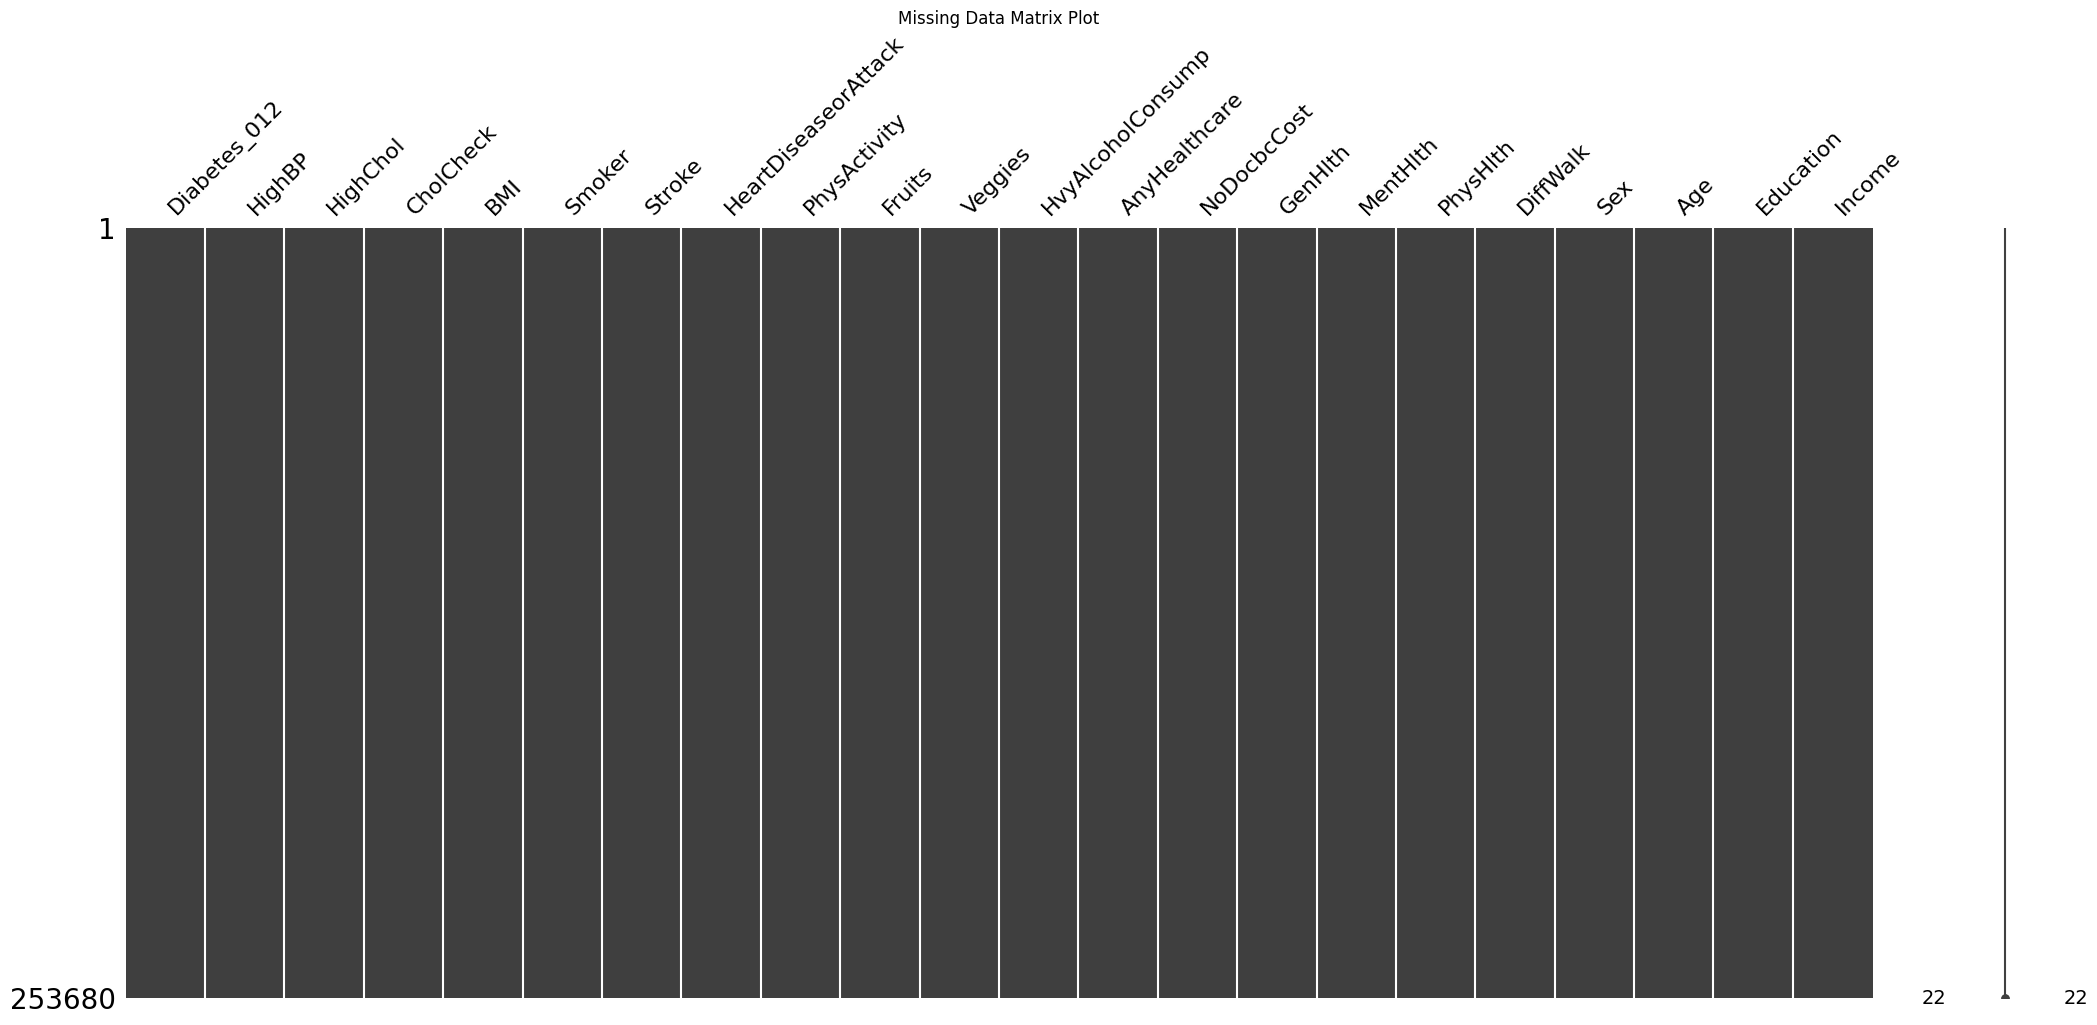

In [7]:
msno.matrix(df)
plt.title('Missing Data Matrix Plot')
plt.show()

In [8]:
df.duplicated().sum()

np.int64(23899)

In [9]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
25,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
29,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
44,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
52,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,2.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.dtypes

,0
Diabetes_012,float64
HighBP,float64
HighChol,float64
CholCheck,float64
BMI,float64
Smoker,float64
Stroke,float64
HeartDiseaseorAttack,float64
PhysActivity,float64
Fruits,float64


In [13]:
df['Diabetes_012'].value_counts()

,count
Diabetes_012,
0.0,190055
2.0,35097
1.0,4629


In [14]:
x=df.drop('Diabetes_012',axis=1)
y=df['Diabetes_012']

In [15]:
y[y == 2] = 1

y.value_counts()

,count
Diabetes_012,
0.0,190055
1.0,39726


In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                229781 non-null  float64
 1   HighChol              229781 non-null  float64
 2   CholCheck             229781 non-null  float64
 3   BMI                   229781 non-null  float64
 4   Smoker                229781 non-null  float64
 5   Stroke                229781 non-null  float64
 6   HeartDiseaseorAttack  229781 non-null  float64
 7   PhysActivity          229781 non-null  float64
 8   Fruits                229781 non-null  float64
 9   Veggies               229781 non-null  float64
 10  HvyAlcoholConsump     229781 non-null  float64
 11  AnyHealthcare         229781 non-null  float64
 12  NoDocbcCost           229781 non-null  float64
 13  GenHlth               229781 non-null  float64
 14  MentHlth              229781 non-null  float64
 15  PhysH

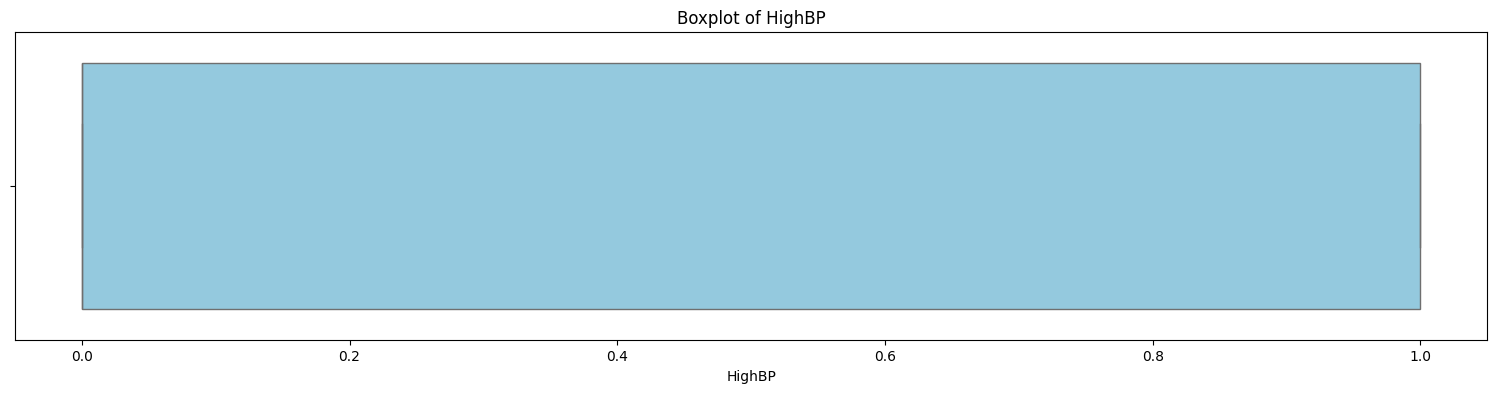

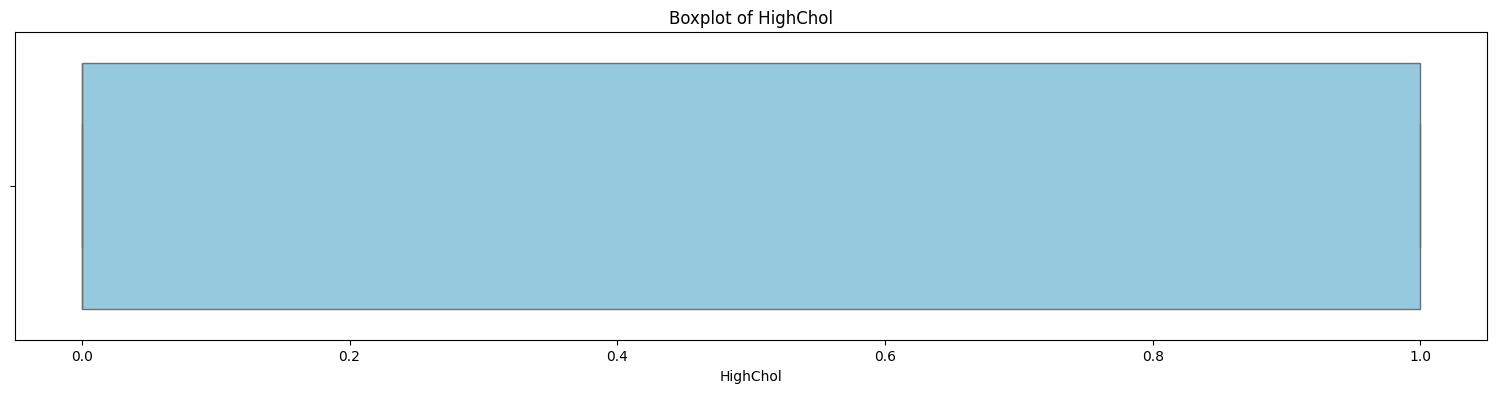

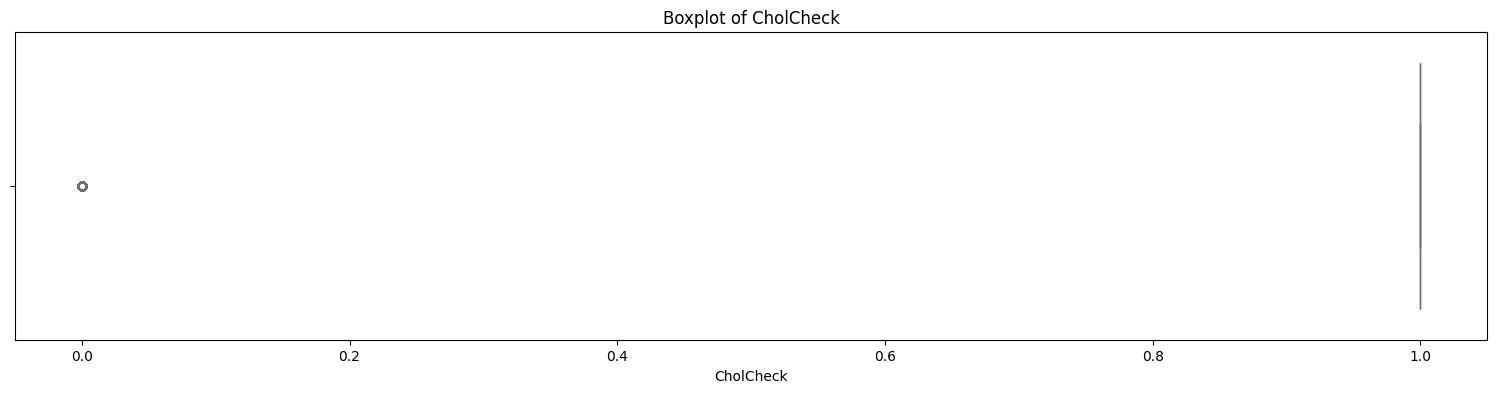

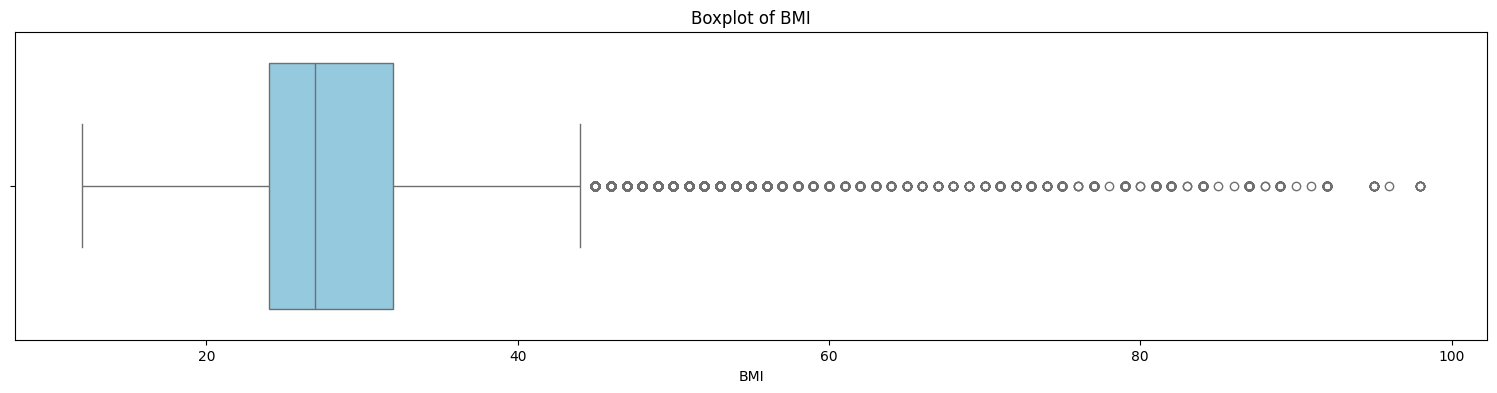

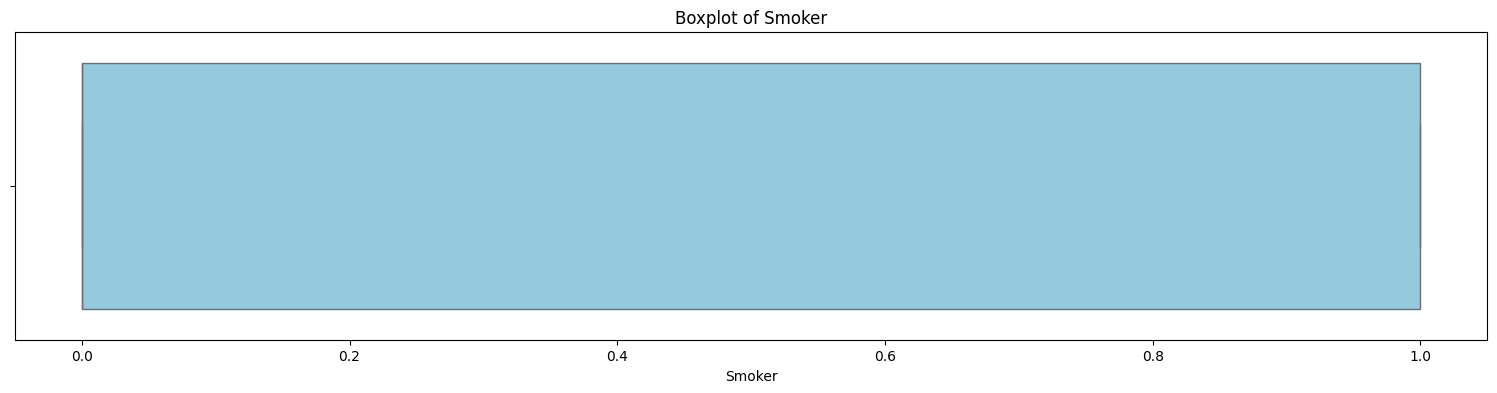

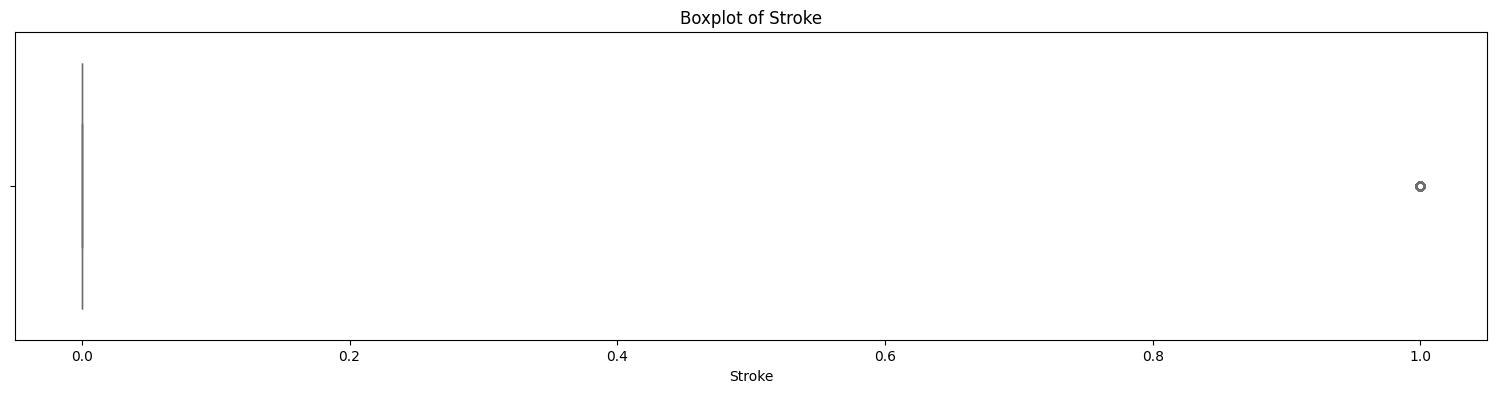

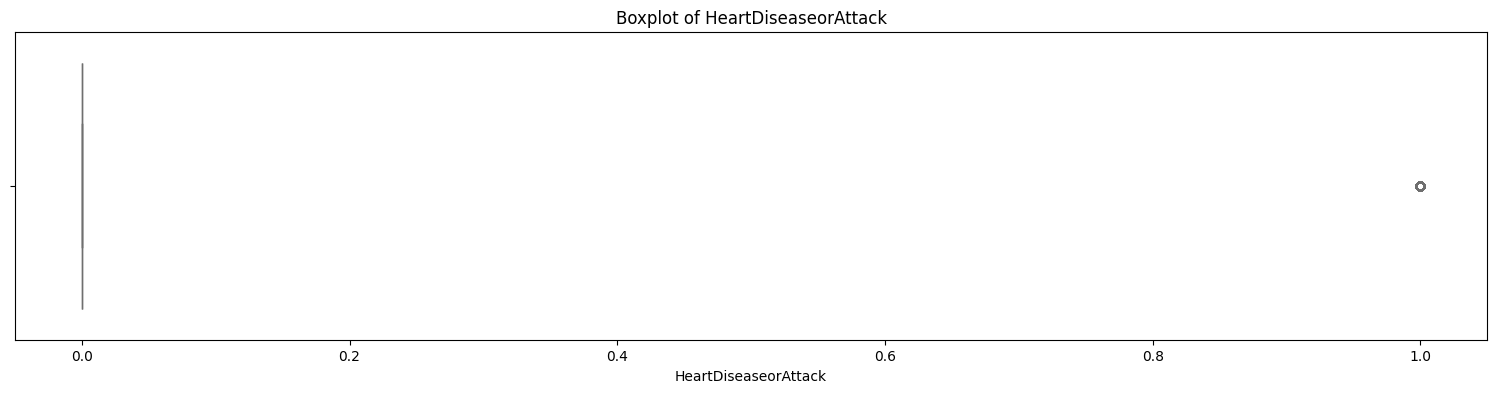

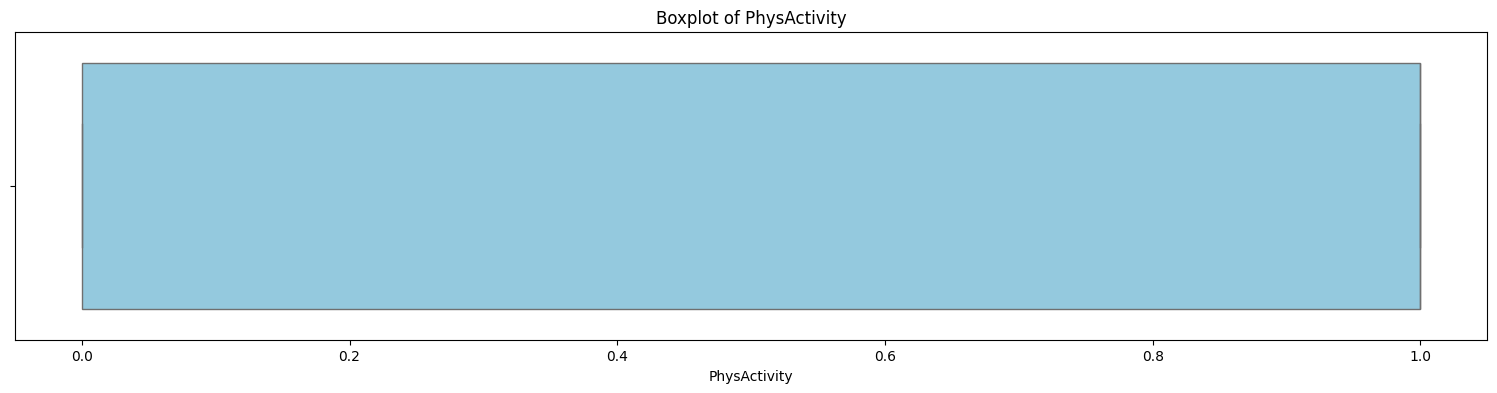

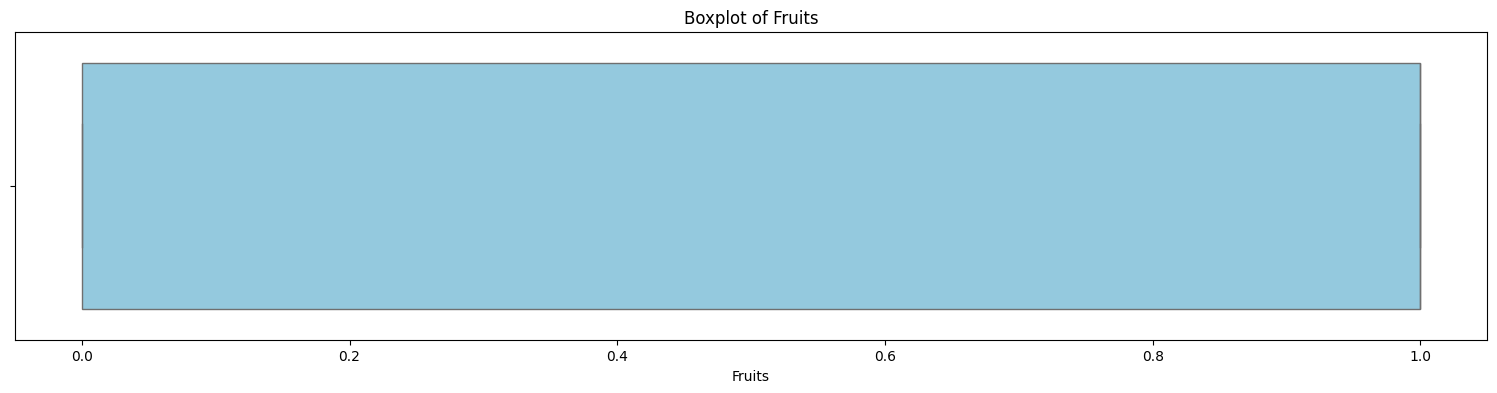

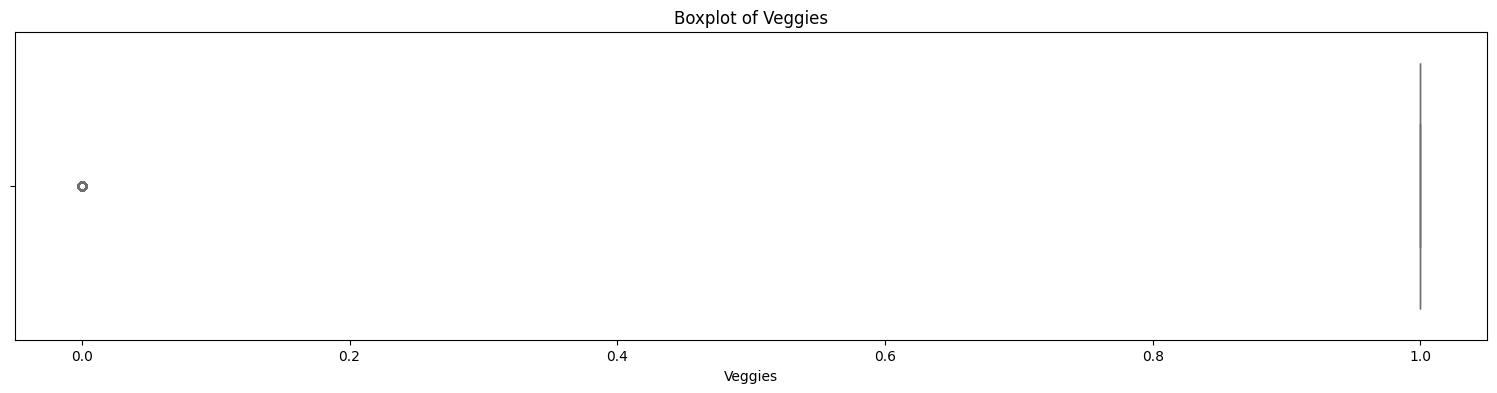

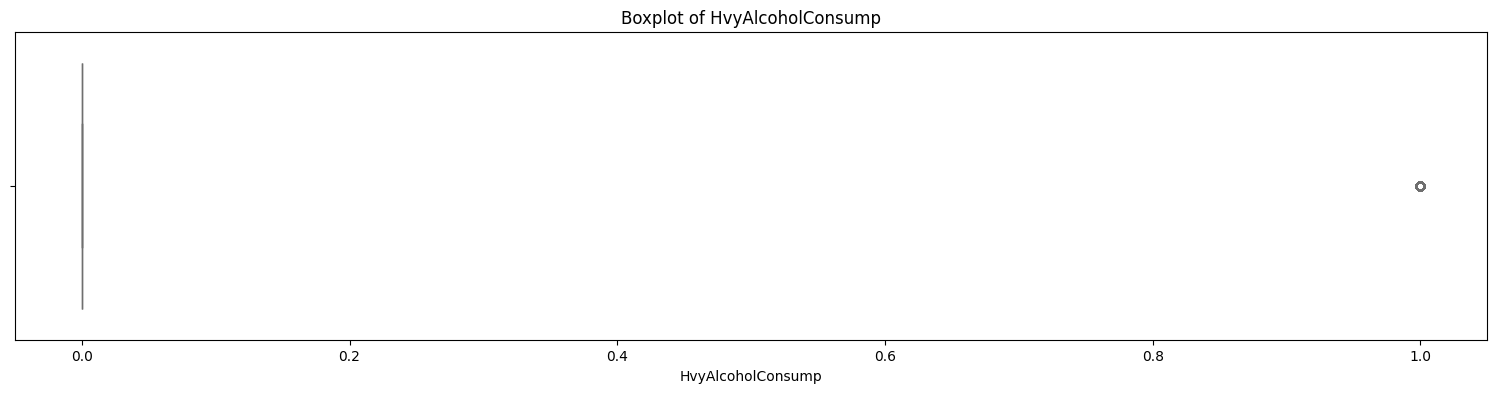

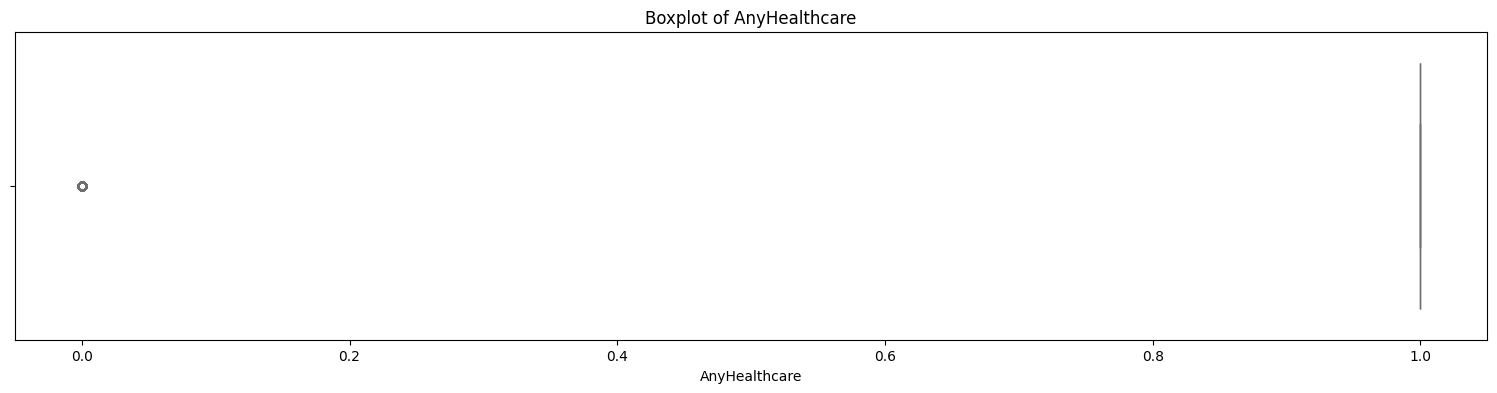

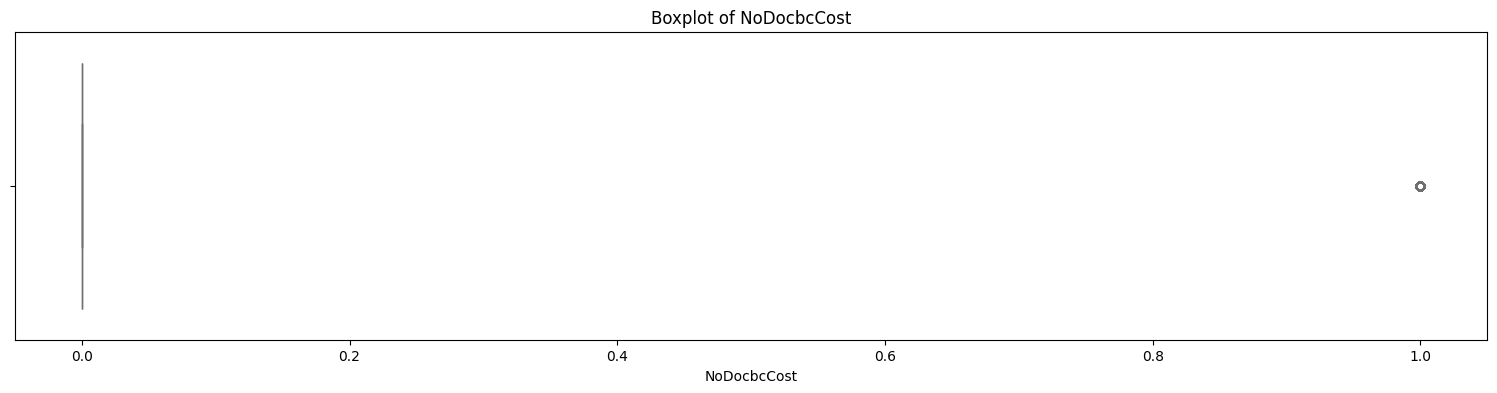

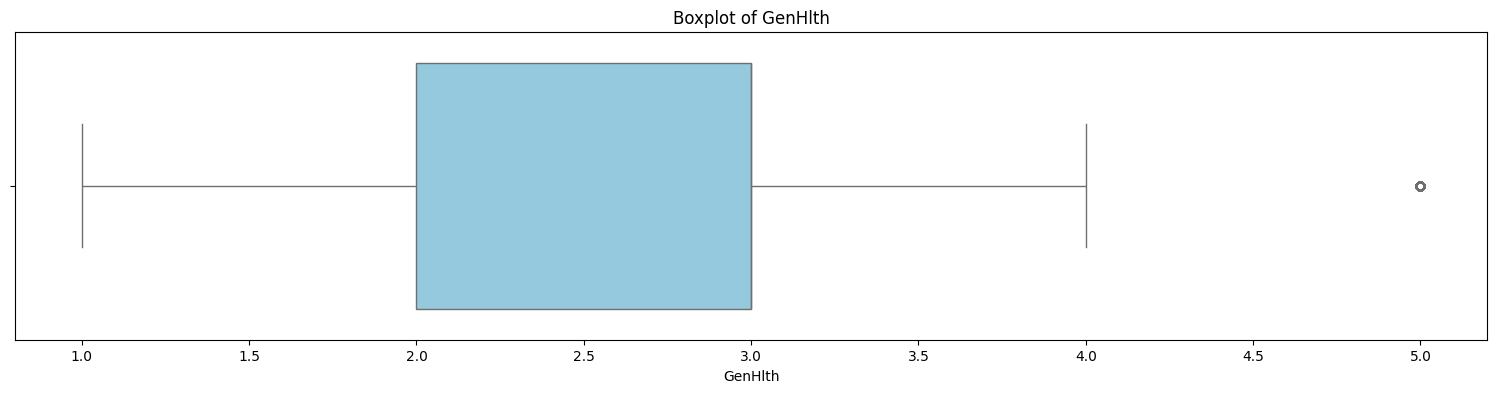

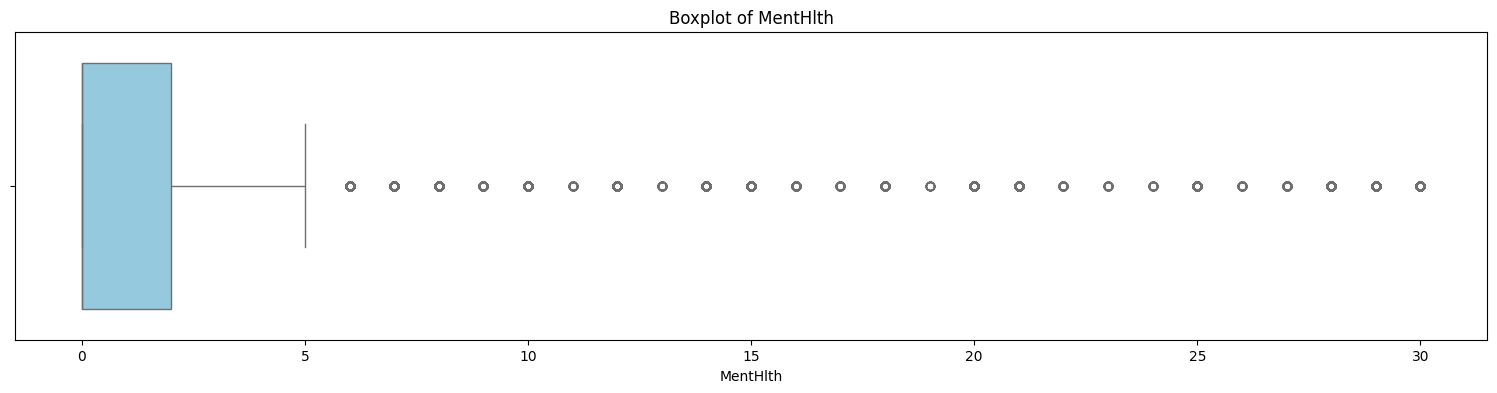

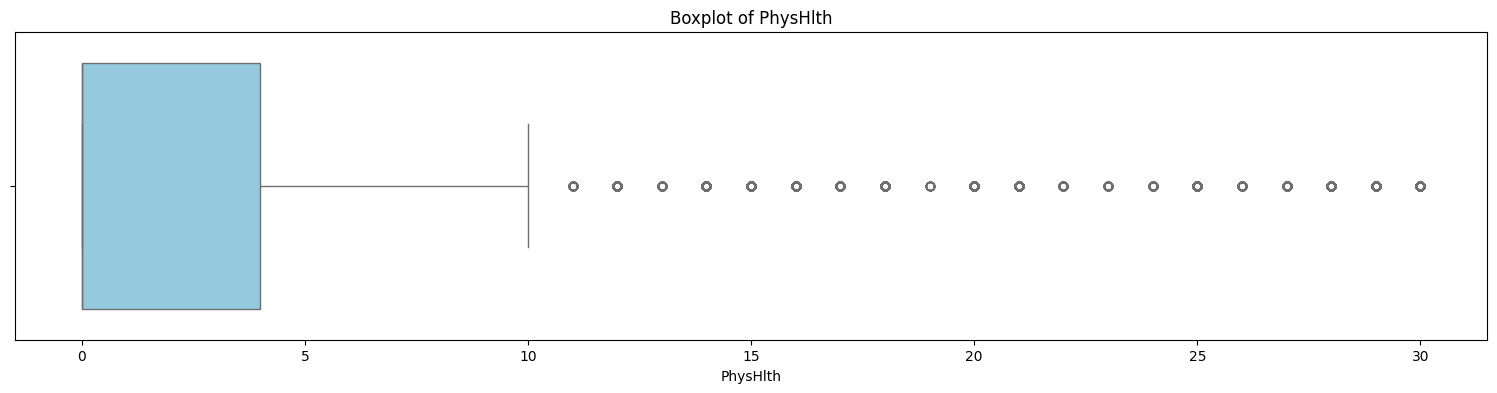

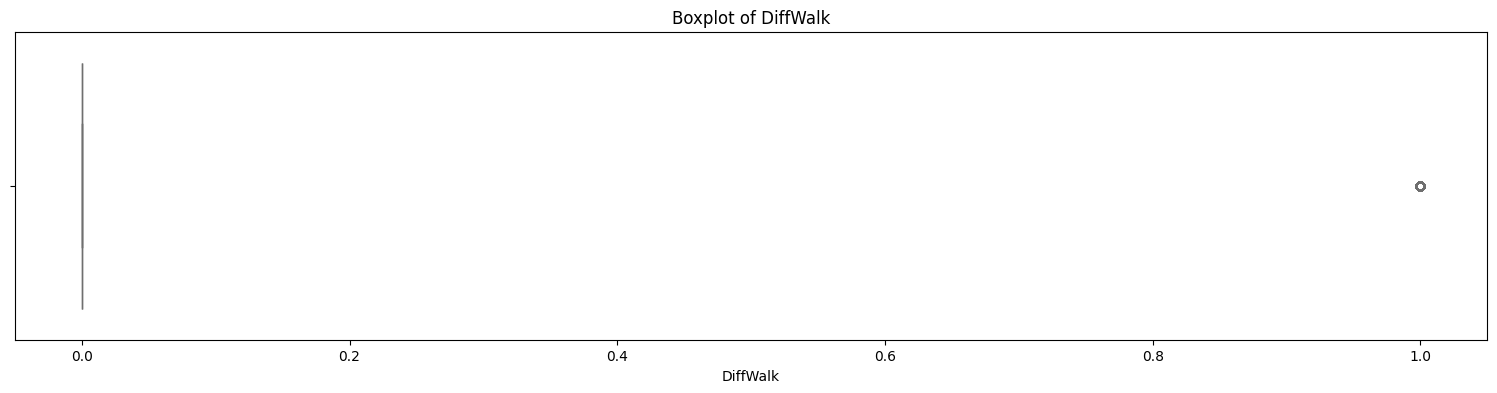

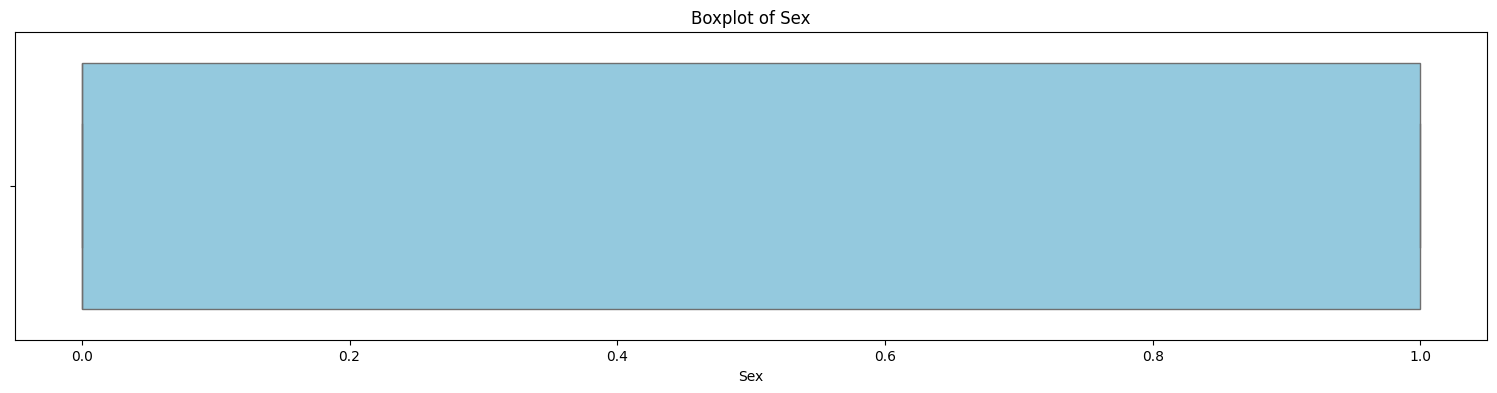

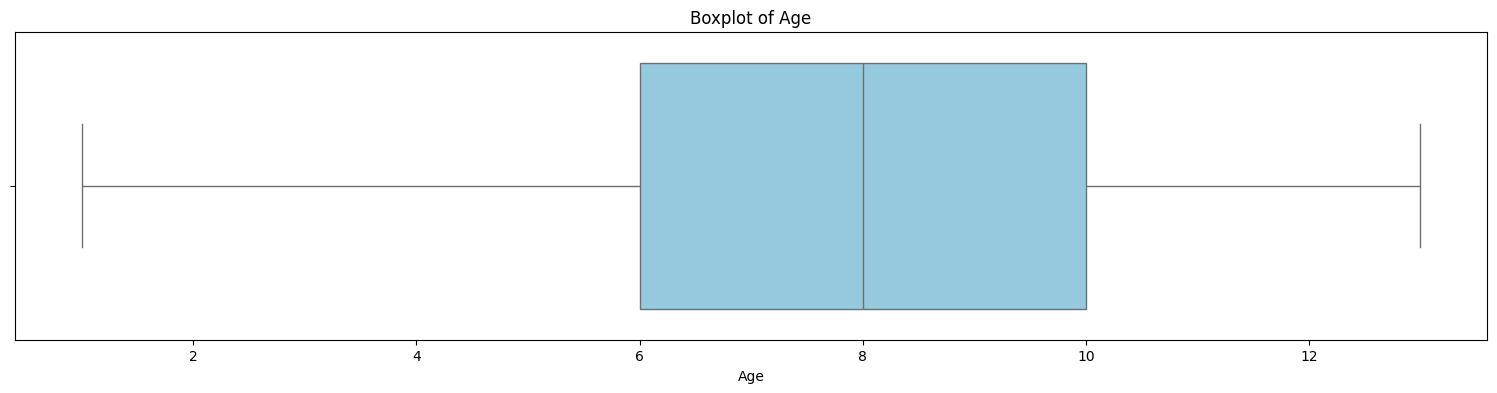

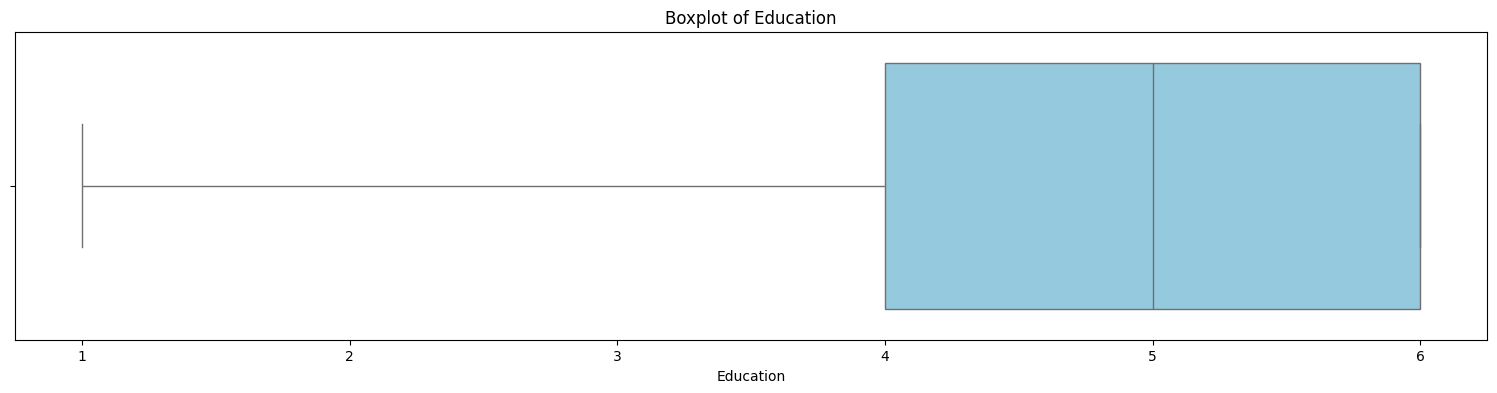

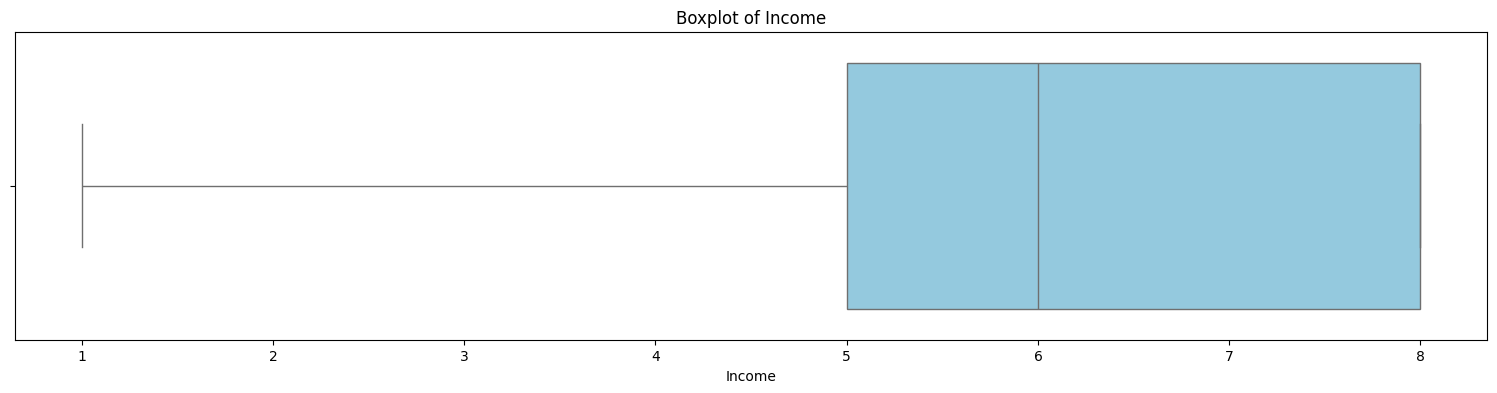

In [17]:
for feature in x.columns:
    plt.figure(figsize=(19, 4))
    sns.boxplot(x=x[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()


#Neural Network

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [27]:
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), # Two hidden layers with 100 and 50 neurons
                    max_iter=400, # 400 epochs
                    learning_rate_init=0.01, # Learning rate of 0.01
                    random_state=42)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), learning_rate_init=0.01,
              max_iter=400, random_state=42)

In [32]:
predictions = mlp.predict(x_test)

print(f"Accuracy: {mlp.score(x_test, y_test)}")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


Accuracy: 0.8320168853493483
[[36226  1890]
 [ 5830  2011]]
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     38116
         1.0       0.52      0.26      0.34      7841

    accuracy                           0.83     45957
   macro avg       0.69      0.60      0.62     45957
weighted avg       0.80      0.83      0.81     45957

